In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

rf_df = pd.read_csv(r"D:\Koulu\AIDA_S24\AIDA_project\aida-projekti-local\archive\random_forest_preprocessed.csv")

display(rf_df.describe())

X = rf_df.drop(columns=['price'])  # Features
y = rf_df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,back_legroom,daysonmarket,dealer_zip,engine_displacement,fleet,frame_damaged,franchise_dealer,front_legroom,fuel_tank_volume,has_accidents,...,major_options_Sunroof/Moonroof,major_options_Remote Start,major_options_CarPlay,major_options_Leather Seats,major_options_Blind Spot Monitoring,major_options_Android Auto,major_options_Parking Sensors,major_options_Adaptive Cruise Control,major_options_Other Option,make_encoded
count,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,...,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06,1.830480e+06
mean,3.790363e+01,7.471512e+01,5.051453e+04,2.776551e+03,5.739085e-01,4.550856e-01,8.399578e-01,4.220093e+01,1.783218e+01,5.231071e-01,...,3.295218e-01,3.366909e-01,3.339774e-01,2.715943e-01,2.880736e-01,2.997940e-01,1.902905e-01,1.768378e-01,5.414705e-01,2.358017e+01
std,2.973164e+00,1.017916e+02,2.727736e+04,1.212500e+03,4.945075e-01,4.979787e-01,3.666453e-01,1.407061e+00,4.739855e+00,4.994659e-01,...,4.700397e-01,4.725783e-01,4.716319e-01,4.447819e-01,4.528657e-01,4.581678e-01,3.925304e-01,3.815315e-01,4.982774e-01,1.576883e+01
min,0.000000e+00,0.000000e+00,9.220000e+02,7.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.600000e+01,1.500000e+01,3.006000e+04,2.000000e+03,0.000000e+00,0.000000e+00,1.000000e+00,4.110000e+01,1.450000e+01,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
50%,3.810000e+01,3.600000e+01,4.806600e+04,2.500000e+03,1.000000e+00,0.000000e+00,1.000000e+00,4.200000e+01,1.660000e+01,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01
75%,3.970000e+01,8.100000e+01,7.618000e+04,3.500000e+03,1.000000e+00,1.000000e+00,1.000000e+00,4.300000e+01,1.950000e+01,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.800000e+01
max,5.980000e+01,2.979000e+03,9.951800e+04,8.100000e+03,1.000000e+00,1.000000e+00,1.000000e+00,5.250000e+01,6.400000e+01,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.600000e+01


In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Hyperparametrien hakuavaruus RandomizedSearchCV:lle
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestRegressor(n_jobs=-1, random_state=42),
    param_distributions=param_dist,
    n_iter=20,  # Testaa 20 satunnaista yhdistelmää
    cv=3,  # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42
)

# Mallin koulutus ja hyperparametrien optimointi RandomizedSearchCV:llä
X_train_sample = X_train.sample(frac=0.5, random_state=42)  # 50% datasta
y_train_sample = y_train.loc[X_train_sample.index]
random_search.fit(X_train_sample, y_train_sample)

# Tulosta parhaat parametrit RandomizedSearchCV:stä
print(f"Best parameters from RandomizedSearch: {random_search.best_params_}")

# Käytä parasta mallia RandomizedSearchCV:stä
rf_model = random_search.best_estimator_

# Ennusteet testidatalle
y_pred = rf_model.predict(X_test)

# Mallin arviointi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Jäännösten tarkastelu
residuals = y_test - y_pred
print(residuals.describe())

# Jos RandomizedSearchCV antaa hyvän tuloksen, voidaan tehdä tarkempi GridSearch pienemmällä hakuavaruudella.

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.1min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  34.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  34.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  34.2s
[CV] END max_depth=No

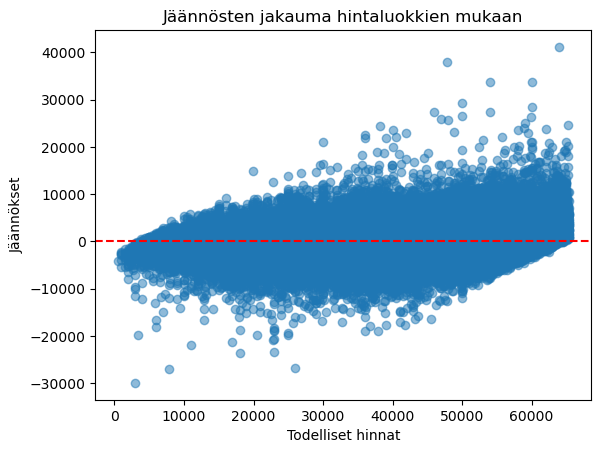

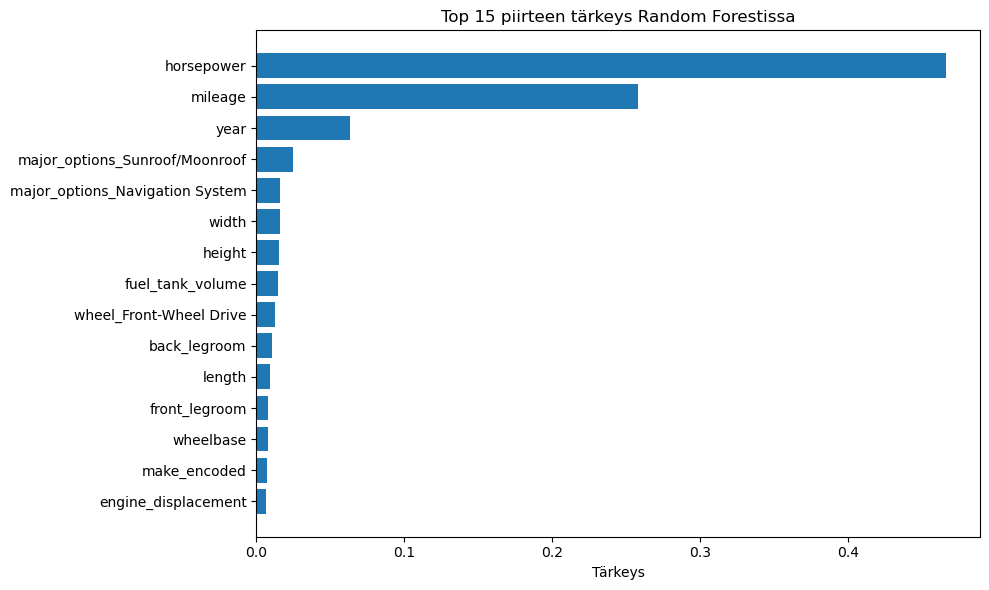

Root Mean Squared Error: 1985.30


In [3]:
import matplotlib.pyplot as plt

plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Todelliset hinnat')
plt.ylabel('Jäännökset')
plt.title('Jäännösten jakauma hintaluokkien mukaan')
plt.show()

# Lasketaan piirteiden tärkeys ja tallennetaan ne DataFrameen
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Järjestetään piirteet tärkeyden mukaan laskevasti
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Valitaan top 15 tärkeintä piirrettä
top_15_features = feature_importances.head(15)

# Visualisoidaan top 15 piirteen tärkeys
plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'][::-1], top_15_features['Importance'][::-1])  # Käännetään järjestys, jotta tärkein on ylimpänä
plt.xlabel('Tärkeys')
plt.title('Top 15 piirteen tärkeys Random Forestissa')
plt.tight_layout()
plt.show()

# RMSE tulostus (pitää olla ylhäällä)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
print(f"Cross-validated RMSE: {np.sqrt(-scores.mean()):.2f}")

In [9]:
from sklearn.model_selection import GridSearchCV
print("suorittaa")

param_grid = {
    'max_depth': [10, 20, 30, None],  # Testattavat syvyydet
}

grid_search = GridSearchCV(
    RandomForestRegressor(
        n_estimators=100,  # Kiinteästi parhaaksi havaittu
        min_samples_split=5,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42
    ),
    param_grid=param_grid,
    cv=3,  # Käytä 3-fold cross-validationia
    scoring='neg_mean_squared_error',
    verbose=2
)

# Suorita GridSearch
# Mallin koulutus ja hyperparametrien optimointi RandomizedSearchCV:llä
X_train_sample2 = X_train.sample(frac=0.5, random_state=42)  # 50% datasta
y_train_sample2 = y_train.loc[X_train_sample.index]
grid_search.fit(X_train_sample2, y_train_sample2)

# Tulosta parhaat parametrit
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.2f}")

suorittaa
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END .......................................max_depth=10; total time=  35.0s
[CV] END .......................................max_depth=10; total time=  35.1s
[CV] END .......................................max_depth=10; total time=  34.7s
[CV] END .......................................max_depth=20; total time=  55.6s
[CV] END .......................................max_depth=20; total time=  55.7s
[CV] END .......................................max_depth=20; total time=  56.8s
[CV] END .......................................max_depth=30; total time= 1.1min
[CV] END .......................................max_depth=30; total time= 1.1min
[CV] END .......................................max_depth=30; total time= 1.1min
[CV] END .....................................max_depth=None; total time= 1.1min
[CV] END .....................................max_depth=None; total time= 1.1min
[CV] END ..............................